In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def viewImage(image):
    cv2.namedWindow('Display', cv2.WINDOW_NORMAL)
    cv2.imshow('Display', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
def grayscale_17_levels (image):
    high = 255
    while(1):  
        low = high - 15
        col_to_be_changed_low = np.array([low])
        col_to_be_changed_high = np.array([high])
        curr_mask = cv2.inRange(gray, col_to_be_changed_low,col_to_be_changed_high)
        gray[curr_mask > 0] = (high)
        high -= 15
        if(low == 0 ):
            break

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbfb665f4e0>,
 <matplotlib.image.AxesImage at 0x7fbfb5d72048>)

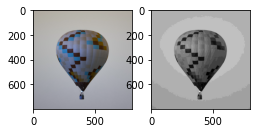

In [ ]:
image = cv2.imread('ballon.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale_17_levels(gray)
plt.subplot(1,3,1),plt.imshow(image,cmap = 'gray')
plt.subplot(1,3,2),plt.imshow(gray,cmap = 'gray')

In [ ]:
def get_area_of_each_gray_level(im):
## convert image to gray scale (must br done before contouring)
    image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    output = []
    high = 255
    first = True
    while(1):
      low = high - 15;
      if(first == False):
          to_be_black_again_low = np.array([high])
          to_be_black_again_high = np.array([255])
          curr_mask = cv2.inRange(image, to_be_black_again_low, 
          to_be_black_again_high)
          image[curr_mask > 0] = (0)
            
        # making values of this gray level white so we can calculate
        # it's area
      ret, threshold = cv2.threshold(image, low, 255, 0)
      contours, hirerchy = cv2.findContours(threshold, 
      cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
      if(len(contours) > 0):
        output.append([cv2.contourArea(contours[0])])
        cv2.drawContours(im, contours, -1, (0,0,255), 3)
      high -= 15
      first = False
      if(low == 0 ):
        break
    return output

[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [7.0], [2.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [19.0], [0.0]]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fbfb5d14b00>,
 <matplotlib.image.AxesImage at 0x7fbfb5db2ef0>)

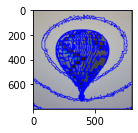

In [ ]:
image = cv2.imread('ballon.jpg')
print(get_area_of_each_gray_level(image))
plt.subplot(1,3,1),plt.imshow(image,cmap = 'gray')